# Predicting Energy and Gas Savings
====================================================

# Part 1: Data Cleaning

Welcome to this Jupyter notebook, where we'll explore the data cleaning process for a machine learning task aimed at predicting gas and energy usage in residential homes participating in the Home Performance with ENERGY STAR® Program from 2007 to 2012 as well as the total project costs.

**Background:**
The Home Performance with ENERGY STAR® Program, overseen by the U.S. Environmental Protection Agency (EPA) and U.S. Department of Energy (DOE), emphasizes promoting energy efficiency. The analysis involves comparing estimated savings against normalized values from an open-source energy efficiency meter.

**About the Home Performance with ENERGY STAR® Program:** "Home Performance with ENERGY STAR® is a national collaborative program between the U.S. Department of Energy and the U.S. Environmental Protection Agency that includes a network of 32 utility and nonprofit sponsors, and 1,300 home performance contractors.
Since 2001, Home Performance with ENERGY STAR has been the trusted source that helps contractors and energy programs deliver home energy upgrades. These upgrades make American homes safer, healthier, and more energy efficient.
The Home Performance with ENERGY STAR program offers a trusted approach to home upgrades that includes a comprehensive evaluation, with recommended work being performed by trained and qualified networks of contractors. A cornerstone of the program is a set of rigorous quality assurance requirements." (source: [Department of Energy](https://www.energy.gov/eere/buildings/home-performance-energy-starr), retrieved 29.01.2024)

**Dataset Overview:**
This dataset backcasts estimated modeled savings for a subset of completed projects in the State of New York (US) from 2007 to 2012. The projects are part of the Home Performance with ENERGY STAR® Program under Residential Existing Homes (One to Four Units) Predicted First Year Savings for Energy Efficiency Measures: 2007 – 2012. The analysis is against normalized savings calculated by an open-source energy efficiency meter. The primary focus in this notebook is on cleaning and preparing this data to develop, train, and fit machine learning models for accurate predictions.

**Datasource:**
[Data - New York State](https://data.world/data-ny-gov/jtrr-tvq4) (Retrieved on 29.01.2024)

**Project Goal:**
The primary goal is to develop machine learning models capable of predicting residential gas and energy use after project completion, as well as total project costs. This will involve leveraging insights from the Home Performance with ENERGY STAR® programme dataset and using advanced algorithms to make predictions.

Let's dive in! 🛠️

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

/var/folders/yk/s4qyg63s1hq80x6c4rqfc6100000gn/T/ipykernel_31940/1975430074.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Load data

In [4]:
data = pd.read_csv('../data/raw_data/residential_home_energy_efficiency.csv')

In [602]:
data.head()

,index,Project ID,Contractor ID,Project County,Project City,Project ZIP,Climate Zone,Weather Station,Weather Station-Normalization,Project Completion Date,...,Evaluated Annual Gas Savings (MMBtu),Central Hudson,Consolidated Edison,LIPA,National Grid,National Fuel Gas,NYSEG,Orange and Rockland,Rochester Gas and Electric,Location 1
0,0,P00000034473,CY0000000014,Onondaga,Fabius,13063,5|A|Cold,725190,725190,08/17/2007,...,0.0,False,False,False,True,False,False,False,False,"Fabius, NY 13063\n(42.850323, -75.979919)"
1,1,P00000110370,CY0000000014,Onondaga,Nedrow,13120,5|A|Cold,725190,725190,10/04/2007,...,0.0,False,False,False,True,False,False,False,False,"Nedrow, NY 13120\n(42.950373, -76.163321)"
2,2,P00000182080,CY0000000014,Onondaga,Jamesville,13078,5|A|Cold,725190,725190,02/27/2008,...,0.0,False,False,False,True,False,False,False,False,"Jamesville, NY 13078\n(42.976691, -76.069719)"
3,3,P00000196191,CY0000000261,Albany,Albany,12203,5|A|Cold,725180,725180,02/20/2008,...,0.0,False,False,False,True,False,False,False,False,"Albany, NY 12203\n(42.680815, -73.836193)"
4,4,P00000327900,CY0000000004,Erie,Buffalo,14221,5|A|Cold,725280,725280,06/18/2008,...,0.0,False,False,False,True,False,False,False,False,"Buffalo, NY 14221\n(42.980424, -78.728009)"


# Inspect data

In [603]:
data.shape

(3652, 37)

In [604]:
cols = []

for colname in data.columns:
    cols.append(colname.lower())

data.columns = cols

for colname in data:
     data.columns = data.columns.str.replace(" ", "_")
        
data.head()

,index,project_id,contractor_id,project_county,project_city,project_zip,climate_zone,weather_station,weather_station-normalization,project_completion_date,...,evaluated_annual_gas_savings_(mmbtu),central_hudson,consolidated_edison,lipa,national_grid,national_fuel_gas,nyseg,orange_and_rockland,rochester_gas_and_electric,location_1
0,0,P00000034473,CY0000000014,Onondaga,Fabius,13063,5|A|Cold,725190,725190,08/17/2007,...,0.0,False,False,False,True,False,False,False,False,"Fabius, NY 13063\n(42.850323, -75.979919)"
1,1,P00000110370,CY0000000014,Onondaga,Nedrow,13120,5|A|Cold,725190,725190,10/04/2007,...,0.0,False,False,False,True,False,False,False,False,"Nedrow, NY 13120\n(42.950373, -76.163321)"
2,2,P00000182080,CY0000000014,Onondaga,Jamesville,13078,5|A|Cold,725190,725190,02/27/2008,...,0.0,False,False,False,True,False,False,False,False,"Jamesville, NY 13078\n(42.976691, -76.069719)"
3,3,P00000196191,CY0000000261,Albany,Albany,12203,5|A|Cold,725180,725180,02/20/2008,...,0.0,False,False,False,True,False,False,False,False,"Albany, NY 12203\n(42.680815, -73.836193)"
4,4,P00000327900,CY0000000004,Erie,Buffalo,14221,5|A|Cold,725280,725280,06/18/2008,...,0.0,False,False,False,True,False,False,False,False,"Buffalo, NY 14221\n(42.980424, -78.728009)"


In [605]:
data = data.drop(columns = "index")

In [606]:
data.dtypes

project_id                                       object
contractor_id                                    object
project_county                                   object
project_city                                     object
project_zip                                       int64
climate_zone                                     object
weather_station                                   int64
weather_station-normalization                     int64
project_completion_date                          object
customer_type                                    object
size_of_home                                    float64
volume_of_home                                  float64
number_of_units                                 float64
year_home_built                                 float64
total_project_cost_($)                          float64
contractor_incentive_($)                        float64
total_incentives_($)                            float64
amount_financed_through_program_($)             

In [607]:
data = data.rename(columns={'total_project_cost_($)': 'total_project_cost', 
                            'contractor_incentive_($)': 'contractor_incentive',
                            'total_incentives_($)': 'total_incentive',
                            'amount_financed_through_program_($)': 'amount_financed_through_program',
                            'estimated_annual_electric_savings_(kwh)': 'estimated_annual_electric_savings',
                            'estimated_annual_gas_savings_(mmbtu)': 'estimated_annual_gas_savings',
                            'estimated_first_year_energy_bill_savings_($)': 'estimated_first_year_energy_bill_savings',
                            'baseline_electric_(kwh)': 'baseline_electric',
                            'baseline_gas_(mmbtu)': 'baseline_gas',
                            'reporting_electric_(kwh)': 'reporting_electric',
                            'reporting_gas_(mmbtu)': 'reporting_gas',
                            'evaluated_annual_electric_savings_(kwh)': 'evaluated_annual_electric_savings',
                            'evaluated_annual_gas_savings_(mmbtu)': 'evaluated_annual_gas_savings'})

In [608]:
data.columns

Index(['project_id', 'contractor_id', 'project_county', 'project_city',
       'project_zip', 'climate_zone', 'weather_station',
       'weather_station-normalization', 'project_completion_date',
       'customer_type', 'size_of_home', 'volume_of_home', 'number_of_units',
       'year_home_built', 'total_project_cost', 'contractor_incentive',
       'total_incentive', 'amount_financed_through_program',
       'estimated_annual_electric_savings', 'estimated_annual_gas_savings',
       'estimated_first_year_energy_bill_savings', 'baseline_electric',
       'baseline_gas', 'reporting_electric', 'reporting_gas',
       'evaluated_annual_electric_savings', 'evaluated_annual_gas_savings',
       'central_hudson', 'consolidated_edison', 'lipa', 'national_grid',
       'national_fuel_gas', 'nyseg', 'orange_and_rockland',
       'rochester_gas_and_electric', 'location_1'],
      dtype='object')

# Data columns explained


- Project County:	The county in which the project was completed.

- Project City:	The city in which the project was completed. 

- Project ZIP:	The ZIP code in which the project was completed. 

- Climate Zone:	Project climate zone. See https://www.energy.gov/eere/buildings/climate-zones for more information. 

- Weather Station:	Weather Station United States Air Force (USAF) Identifier closest to the project. 

- Weather Station-Normalization:	Weather Station USAF Identifier for weather station used for normalization (may be different from the weather station closest to the project if insufficient weather data).

- Project Completion Date:	The date the project was completed. 

- Customer Type:	Indicates if the homeowner received market rate incentives or assisted subsidy.

- Size of Home:	The size of the home in which the project was completed. 

- Volume of Home:	Cubic feet of conditioned space in the home.

- Number of Units:	Number of units served by the Program. 

- Year Home Built:	The year the home in which the project was completed was built.

- Total Project Cost ($):	The total cost of the project in US dollars. 

- Contractor Incentive ($):	Amount of incentive in US dollars paid directly to the Contractor.

- Total Incentives ($):	Amount of homeowner incentive in US dollars. Zero dollars represent either projects receiving only financing, or Market Rate projects that did not receive an incentive, but still participated in the program to take advantage of working with participating contractors and Quality Assurance benefits. 

- Amount Financed Through Program ($): Project loan amount in US dollars. If zero, then project was not financed. 

- Estimated Annual Electric Savings (kWh):	Modeled annual electric savings estimate in kWh per model developed by participating contractor at time of audit. Negative numbers represent projects with post-retrofit increase in electric consumption, typically from fuel conversions or ancillary savings. Blank cells represent data that were not required or are not currently available. 

- Estimated Annual Gas Savings (MMBtu):	Modeled annual gas savings estimate in MMBtu per model developed by participating contractor at time of audit. Negative numbers represent projects with post-retrofit increase in gas consumption, typically from fuel conversions or ancillary savings. Blank cells represent data that were not required or are not currently available. 

- Estimated First Year Energy Bill Savings ($):	Estimated post-retrofit first year dollar savings (USD) from model developed by the contractor at time of audit. Negative numbers represent projects with estimated post-retrofit first year dollar expenses, typically occurring when non-energy work was completed such as health and safety improvements, or when work was done in conjunction with another, net positive energy savings project. Blank cells represent data that were not required or are not currently available. 

- Baseline Electric (kWh):	The modeled, weather normalized electric usage during the baseline period (9 continuous months prior to intervention). Blank cells represent data that were not required or are not currently available.

- Baseline Gas (MMBtu):	The modeled, weather normalized natural gas usage during the baseline period (9 continuous months prior to intervention). Blank cells represent data that were not required or are not currently available. 

- Reporting Electric (kWh):	The modeled, weather-normalized electric usage during the reporting period (9 continuous months after the intervention). Blank cells represent data that were not required or are not currently available. 

- Reporting Gas (MMBtu):	The modeled, weather-normalized natural gas usage during the reporting period (9 continuous months after the intervention). Blank cells represent data that were not required or are not currently available. 

- Evaluated Annual Electric Savings (kWh): The modeled, weather normalized annual site-level electric savings (kWh), calculated as pre-retrofit normalized baseline less post-retrofit normalized usage. Negative numbers represent projects with post-retrofit increase in electric consumption, typically from fuel conversions or ancillary savings.

- Evaluated Annual Gas Savings (MMBtu):	The modeled, weather normalized annual site-level gas savings (MMBtu), calculated as pre-retrofit normalized baseline less post-retrofit normalized usage. Negative numbers represent projects with post-retrofit increase in gas consumption, typically from fuel conversions or ancillary savings.

- Central Hudson: Utility for the project, where “True” indicates the project is in the Central Hudson territory. Some homes are served by more than one utility company.

- Consolidated Edison: Utility for the project, where “True” indicates the project is in the Consolidated Edison territory. Some homes are served by more than one utility company.

- LIPA:	Utility for the project, where “True” indicates the project is in the Long Island Power Authority (LIPA) territory. Some homes are served by more than one utility company.

- National Grid:	Utility for the project, where “True” indicates the project is in the National Grid territory. Some homes are served by more than one utility company.

- National Fuel Gas:	Utility for the project, where “True” indicates the project is in the National Fuel Gas territory. Some homes are served by more than one utility company.

- NYSEG: Utility for the project, where “True” indicates the project is in the New York State Electric and Gas territory. Some homes are served by more than one utility company.

- Orange and Rockland: Utility for the project, where “True” indicates the project is in the Orange and Rockland territory. Some homes are served by more than one utility company.

- Rochester Gas and Electric: Utility for the project, where “True” indicates the project is in the Rochester Gas and Electric territory. Some homes are served by more than one utility company.

- Location 1: Open Data/Socrata-generated geocoding information.

In [609]:
# changing datatypes
data['project_completion_date'] = pd.to_datetime(data['project_completion_date'])

In [610]:
##Checking if the floats are really floats or rather integers

for column in data.columns:
    if data[column].dtype == 'float64':
        print(column, data[column].unique())

size_of_home [2422.  826. 1920. ... 3812. 2102. 2984.]
volume_of_home [17602.  5873. 15360. ... 23872.  9928. 22944.]
number_of_units [nan  1.  2.  3.  4.]
year_home_built [1977. 1890. 1982. 1940. 1954. 1952. 1984. 1975. 1945. 1986. 1840. 1980.
 1999. 1972. 1955. 1965. 1985. 1989. 1981. 1976. 1930. 1950. 1800. 1901.
 1988. 1926. 1964. 1880. 1993. 1900. 1938. 1910. 1953. 1920. 1998. 1968.
 1959. 1815. 1906. 1979. 1995. 1983. 1991. 1962. 1941. 1924. 2002. 1922.
 1960. 1994. 1957. 1956. 1970. 1987. 2003. 1915. 1990. 1949. 1943. 1929.
 1948. 1974. 1967. 1978. 1963. 1935. 1973. 1958. 1966. 1905. 1875. 1848.
 1928. 2001. 1971. 1939.   nan 1932. 1992. 1925. 1961. 1870. 1951. 1919.
 1850. 1807. 1865. 1860. 1934. 1947. 1849. 1810. 2004. 1946. 1936. 1931.
 1942. 1908. 1907. 1874. 2000. 1923. 1916. 1885. 1834. 1918. 1888. 1912.
 1937. 1892. 1969. 1927. 1898. 1883. 1996. 1944. 1917. 1933. 1843. 1866.
 1914. 1895. 1921. 1911. 1808. 1897. 2005. 1857. 1820. 1829. 1872. 1836.
 1824. 1756. 1909. 1997. 

In [611]:
##data['year_home_built'] = data['year_home_built'].astype(int) -> done later since it is containing NANs

In [612]:
##data['number_of_units'] = data['number_of_units'].astype(int) -> done later since it is containing NANs

In [613]:
data.isna().sum()

project_id                                     0
contractor_id                                  0
project_county                                 0
project_city                                   0
project_zip                                    0
climate_zone                                   0
weather_station                                0
weather_station-normalization                  0
project_completion_date                        0
customer_type                                  0
size_of_home                                   1
volume_of_home                                 1
number_of_units                              187
year_home_built                               91
total_project_cost                             0
contractor_incentive                           0
total_incentive                                0
amount_financed_through_program                0
estimated_annual_electric_savings           2566
estimated_annual_gas_savings                2566
estimated_first_year

The columns estimated_annual_electric_savings_(kwh), estimated_annual_gas_savings_(mmbtu) are estimations
I'm considering to drop the columns since they might night be needed for further analysis 
--> evaluated_annual_electric_savings_(kwh) and evaluated_annual_gas_savings_(mmbtu) will be my columns for any predictions


In [614]:
data.describe()

,project_zip,weather_station,weather_station-normalization,project_completion_date,size_of_home,volume_of_home,number_of_units,year_home_built,total_project_cost,contractor_incentive,...,amount_financed_through_program,estimated_annual_electric_savings,estimated_annual_gas_savings,estimated_first_year_energy_bill_savings,baseline_electric,baseline_gas,reporting_electric,reporting_gas,evaluated_annual_electric_savings,evaluated_annual_gas_savings
count,3652.000000,3652.000000,3652.000000,3652,3651.000000,3651.000000,3465.000000,3561.000000,3652.000000,3652.000000,...,3652.000000,1086.000000,1086.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000
mean,13446.686473,738613.924425,726181.952355,2009-08-12 13:20:02.628696576,1952.940838,15637.539578,1.033478,1949.976411,7924.819578,351.585641,...,1557.642894,403.046041,34.400783,657.592823,6282.483634,61.417612,6025.027240,53.369770,257.456347,8.047883
min,10027.000000,724988.000000,725020.000000,2007-06-09 00:00:00,520.000000,4160.000000,1.000000,1756.000000,500.000000,0.000000,...,0.000000,-10624.000000,-25.840000,1.190000,0.000000,0.000000,0.000000,0.000000,-14674.330000,-180.170000
25%,13084.000000,725190.000000,725190.000000,2008-02-19 00:00:00,1365.500000,10816.000000,1.000000,1938.000000,4425.750000,215.000000,...,0.000000,0.000000,17.765000,261.725000,0.000000,0.000000,0.000000,0.000000,-238.692500,0.000000
50%,13492.000000,725196.000000,725280.000000,2008-11-06 00:00:00,1792.000000,14208.000000,1.000000,1955.000000,6866.000000,345.050000,...,0.000000,81.500000,28.335000,514.390000,5854.620000,65.330000,5646.685000,56.310000,0.000000,0.000000
75%,14216.000000,725280.000000,725280.000000,2011-01-29 00:00:00,2320.000000,18432.000000,1.000000,1970.000000,10114.250000,500.000000,...,0.000000,654.000000,46.090000,890.985000,9411.177500,105.637500,9136.332500,90.932500,631.390000,15.482500
max,14905.000000,998435.000000,744865.000000,2014-11-18 00:00:00,10260.000000,82080.000000,4.000000,2010.000000,44245.000000,1050.000000,...,24850.000000,7786.000000,193.210000,5919.870000,62852.130000,1775.140000,42520.660000,1688.410000,47128.950000,184.510000
std,937.275460,58095.832440,4102.042915,NaN,859.198027,7055.811599,0.199680,31.266775,4730.480340,176.284916,...,3725.555316,802.562307,25.055760,584.244384,5799.134851,68.076213,5384.987399,60.347944,2136.918253,19.203009


In [615]:
data['weather_station-normalization'].unique() ##Weather Station-Normalization:	The method used to normalize the energy usage data.

array([725190, 725180, 725280, 725290, 725150, 725287, 743700, 725235,
       726227, 726228, 726223, 725025, 725266, 725075, 725145, 725038,
       725036, 725156, 744864, 744860, 725037, 744865, 725030, 725165,
       725020])

In [616]:
data['weather_station'].unique() ##Weather Station: The weather station used to normalize the energy usage data.

array([725190, 725180, 725280, 725146, 725290, 725196, 725287, 744989,
       744104, 725235, 726227, 743700, 726228, 726223, 725025, 725157,
       725075, 724988, 725266, 726166, 725015, 997991, 998009, 740001,
       725038, 725155, 998266, 725194, 998168, 998235, 725036, 725145,
       725156, 744864, 725150, 744860, 997280, 725037, 725016, 725030,
       725220, 997271, 998435, 725050, 744865, 997743, 725020])

In [617]:
data['climate_zone'].unique() ##I will transform this into a numeric value since it could be important for my models

array(['5|A|Cold', '6|A|Cold', '4|A|Mixed-Humid'], dtype=object)

In [618]:
data['climate_zone'] = data['climate_zone'].apply(lambda x: x.split('|')[-0] if '|' in x else x)

In [619]:
data['climate_zone'].unique()

array(['5', '6', '4'], dtype=object)

In [620]:
##Climate zone: '5|A|Cold', '6|A|Cold', '4|A|Mixed-Humid'

In [621]:
data['climate_zone'] = data['climate_zone'].astype(int)

In [622]:
data['climate_zone'].dtype

dtype('int64')

# Dealing with the boolean columns

In [623]:
##the boolean columns represent all the gas and electricty companies -> it could be crucial for the energy savings and especially the bill

##first checking if there isn't a column with all False

In [624]:
boolean_columns = ['central_hudson', 'consolidated_edison', 'lipa', 'national_grid', 'national_fuel_gas', 
                   'nyseg', 'orange_and_rockland', 'rochester_gas_and_electric']

data['all_false'] = ~data[boolean_columns].any(axis=1)

rows_with_all_false = data[data['all_false']]

rows_with_all_false

,project_id,contractor_id,project_county,project_city,project_zip,climate_zone,weather_station,weather_station-normalization,project_completion_date,customer_type,...,central_hudson,consolidated_edison,lipa,national_grid,national_fuel_gas,nyseg,orange_and_rockland,rochester_gas_and_electric,location_1,all_false


In [625]:
##since all rows contain at least one True value I will transform them into integers

data[boolean_columns] = data[boolean_columns].astype(bool).astype(int)

In [626]:
data.head()

,project_id,contractor_id,project_county,project_city,project_zip,climate_zone,weather_station,weather_station-normalization,project_completion_date,customer_type,...,central_hudson,consolidated_edison,lipa,national_grid,national_fuel_gas,nyseg,orange_and_rockland,rochester_gas_and_electric,location_1,all_false
0,P00000034473,CY0000000014,Onondaga,Fabius,13063,5,725190,725190,2007-08-17,Market,...,0,0,0,1,0,0,0,0,"Fabius, NY 13063\n(42.850323, -75.979919)",False
1,P00000110370,CY0000000014,Onondaga,Nedrow,13120,5,725190,725190,2007-10-04,Assisted,...,0,0,0,1,0,0,0,0,"Nedrow, NY 13120\n(42.950373, -76.163321)",False
2,P00000182080,CY0000000014,Onondaga,Jamesville,13078,5,725190,725190,2008-02-27,Market,...,0,0,0,1,0,0,0,0,"Jamesville, NY 13078\n(42.976691, -76.069719)",False
3,P00000196191,CY0000000261,Albany,Albany,12203,5,725180,725180,2008-02-20,Assisted,...,0,0,0,1,0,0,0,0,"Albany, NY 12203\n(42.680815, -73.836193)",False
4,P00000327900,CY0000000004,Erie,Buffalo,14221,5,725280,725280,2008-06-18,Market,...,0,0,0,1,0,0,0,0,"Buffalo, NY 14221\n(42.980424, -78.728009)",False


In [666]:
data = data.drop(columns = ['all_false'])

# Dealing with the location_1 column

the location_1 column contains the city name and city zip together with some coordinates, since the city and zip data is already contained in different columns I will extract the coordinates for a further possible geographical analysis and drop the location_1 column, later I will exclude the coordinates column so that the models want interpret it as numerical input

In [627]:
def extract_coordinates(text):
    match = re.search(r'\(([^)]+)', text)
    if match:
        return match.group(1)
    return None

# Apply the function to create a new column
data['coordinates'] = data['location_1'].apply(extract_coordinates)

In [628]:
data.head()

,project_id,contractor_id,project_county,project_city,project_zip,climate_zone,weather_station,weather_station-normalization,project_completion_date,customer_type,...,consolidated_edison,lipa,national_grid,national_fuel_gas,nyseg,orange_and_rockland,rochester_gas_and_electric,location_1,all_false,coordinates
0,P00000034473,CY0000000014,Onondaga,Fabius,13063,5,725190,725190,2007-08-17,Market,...,0,0,1,0,0,0,0,"Fabius, NY 13063\n(42.850323, -75.979919)",False,"42.850323, -75.979919"
1,P00000110370,CY0000000014,Onondaga,Nedrow,13120,5,725190,725190,2007-10-04,Assisted,...,0,0,1,0,0,0,0,"Nedrow, NY 13120\n(42.950373, -76.163321)",False,"42.950373, -76.163321"
2,P00000182080,CY0000000014,Onondaga,Jamesville,13078,5,725190,725190,2008-02-27,Market,...,0,0,1,0,0,0,0,"Jamesville, NY 13078\n(42.976691, -76.069719)",False,"42.976691, -76.069719"
3,P00000196191,CY0000000261,Albany,Albany,12203,5,725180,725180,2008-02-20,Assisted,...,0,0,1,0,0,0,0,"Albany, NY 12203\n(42.680815, -73.836193)",False,"42.680815, -73.836193"
4,P00000327900,CY0000000004,Erie,Buffalo,14221,5,725280,725280,2008-06-18,Market,...,0,0,1,0,0,0,0,"Buffalo, NY 14221\n(42.980424, -78.728009)",False,"42.980424, -78.728009"


In [629]:
data = data.drop(columns=['location_1'])

In [630]:
data.head()

,project_id,contractor_id,project_county,project_city,project_zip,climate_zone,weather_station,weather_station-normalization,project_completion_date,customer_type,...,central_hudson,consolidated_edison,lipa,national_grid,national_fuel_gas,nyseg,orange_and_rockland,rochester_gas_and_electric,all_false,coordinates
0,P00000034473,CY0000000014,Onondaga,Fabius,13063,5,725190,725190,2007-08-17,Market,...,0,0,0,1,0,0,0,0,False,"42.850323, -75.979919"
1,P00000110370,CY0000000014,Onondaga,Nedrow,13120,5,725190,725190,2007-10-04,Assisted,...,0,0,0,1,0,0,0,0,False,"42.950373, -76.163321"
2,P00000182080,CY0000000014,Onondaga,Jamesville,13078,5,725190,725190,2008-02-27,Market,...,0,0,0,1,0,0,0,0,False,"42.976691, -76.069719"
3,P00000196191,CY0000000261,Albany,Albany,12203,5,725180,725180,2008-02-20,Assisted,...,0,0,0,1,0,0,0,0,False,"42.680815, -73.836193"
4,P00000327900,CY0000000004,Erie,Buffalo,14221,5,725280,725280,2008-06-18,Market,...,0,0,0,1,0,0,0,0,False,"42.980424, -78.728009"


# Dealing with missing data

# 1. Number of units

In [631]:
data["number_of_units"].unique()

array([nan,  1.,  2.,  3.,  4.])

In [632]:
data["number_of_units"].mean()

1.0334776334776334

In [633]:
data["number_of_units"].median()

1.0

In [634]:
data["number_of_units"] = data["number_of_units"].fillna(data["number_of_units"].median())

##I'm replacing with the median since the data does not contain floats but only integers

In [635]:
data["number_of_units"].isna().sum()

0

In [636]:
data['number_of_units'] = data['number_of_units'].astype(int)

In [637]:
data["number_of_units"].unique()

array([1, 2, 3, 4])

# 2. Year home built

In [638]:
data["year_home_built"].value_counts(dropna = False)

year_home_built
1950.0    274
1960.0    158
1955.0    147
1920.0    126
1940.0    114
         ... 
1825.0      1
1793.0      1
1844.0      1
1815.0      1
2010.0      1
Name: count, Length: 169, dtype: int64

In [639]:
data["year_home_built"].fillna(data["year_home_built"].median(), inplace=True)

/var/folders/yk/s4qyg63s1hq80x6c4rqfc6100000gn/T/ipykernel_97193/4217508949.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["year_home_built"].fillna(data["year_home_built"].median(), inplace=True)


In [640]:
data['year_home_built'] = data['year_home_built'].astype(int)

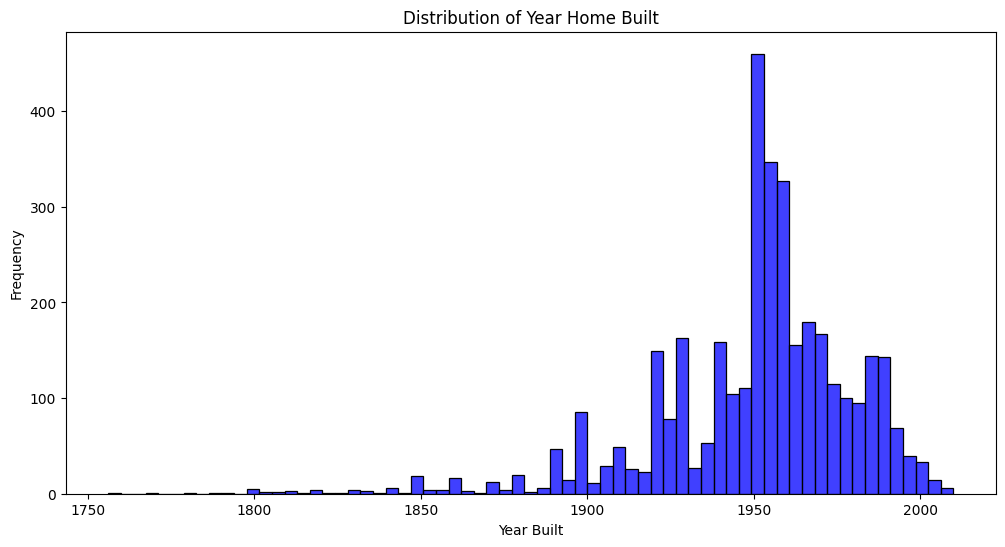

In [641]:
plt.figure(figsize=(12, 6))
sns.histplot(data["year_home_built"], color='blue')
plt.title('Distribution of Year Home Built')
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.show()

/Users/simonefischer/Ironhack/Week_9/Final_Project/finalv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


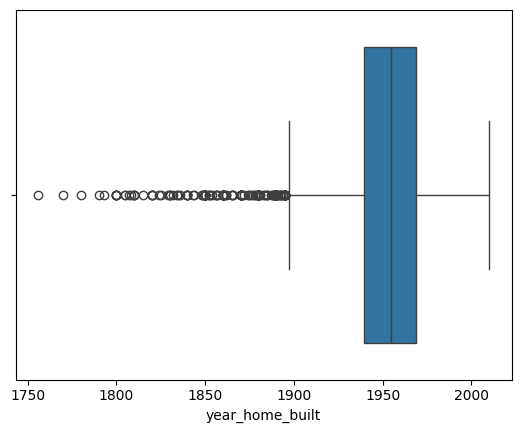

In [642]:
sns.boxplot(x=data["year_home_built"])
plt.show()

In [643]:
data["year_home_built"].min()

1756

In [644]:
data["year_home_built"].max()

2010

In [645]:
##binning the years
bins = [1800, 1900, 1950, 2000, 2010]
labels = ['Very Old', 'Old', 'Moderate', 'New']
data['age_category'] = pd.cut(data['year_home_built'], bins=bins, labels=labels, right=False)



In [646]:
data['age_category']

0       Moderate
1       Very Old
2       Moderate
3            Old
4       Moderate
          ...   
3647         Old
3648         Old
3649         Old
3650    Moderate
3651         Old
Name: age_category, Length: 3652, dtype: category
Categories (4, object): ['Very Old' < 'Old' < 'Moderate' < 'New']

In [647]:
data["age_category"].fillna(data["age_category"].mode()[0], inplace=True)

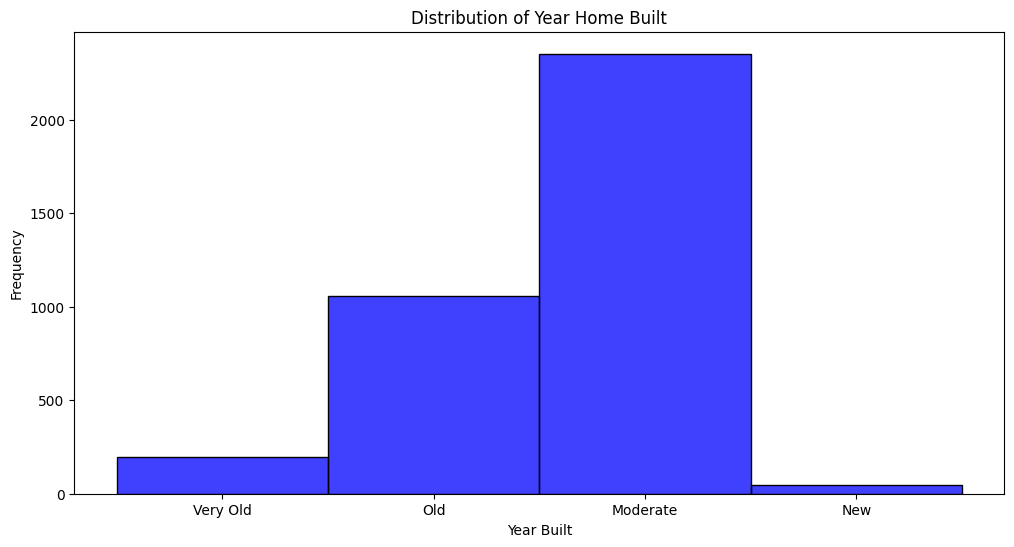

In [648]:
plt.figure(figsize=(12, 6))
sns.histplot(data['age_category'], color='blue')
plt.title('Distribution of Year Home Built')
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.show()

# 3. size_of_home & volume_of_home                                     

In [649]:
data['size_of_home'].describe()

count     3651.000000
mean      1952.940838
std        859.198027
min        520.000000
25%       1365.500000
50%       1792.000000
75%       2320.000000
max      10260.000000
Name: size_of_home, dtype: float64

In [650]:
data['size_of_home'].median()

1792.0

In [651]:
data['size_of_home'].fillna(data['size_of_home'].median(), inplace=True)

/var/folders/yk/s4qyg63s1hq80x6c4rqfc6100000gn/T/ipykernel_97193/3641859587.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['size_of_home'].fillna(data['size_of_home'].median(), inplace=True)


In [652]:
data['volume_of_home'].describe()

count     3651.000000
mean     15637.539578
std       7055.811599
min       4160.000000
25%      10816.000000
50%      14208.000000
75%      18432.000000
max      82080.000000
Name: volume_of_home, dtype: float64

In [653]:
data['volume_of_home'].median()

14208.0

In [654]:
data['volume_of_home'].fillna(data['volume_of_home'].median(), inplace=True)

/var/folders/yk/s4qyg63s1hq80x6c4rqfc6100000gn/T/ipykernel_97193/2063383040.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['volume_of_home'].fillna(data['volume_of_home'].median(), inplace=True)


# 4. Estimated Annual Savings

About 2/3 of the estimated annual saving data for gas and electricity is missing. I start by checking the distribution of the values. 

### 4.1 Estimated electric savings

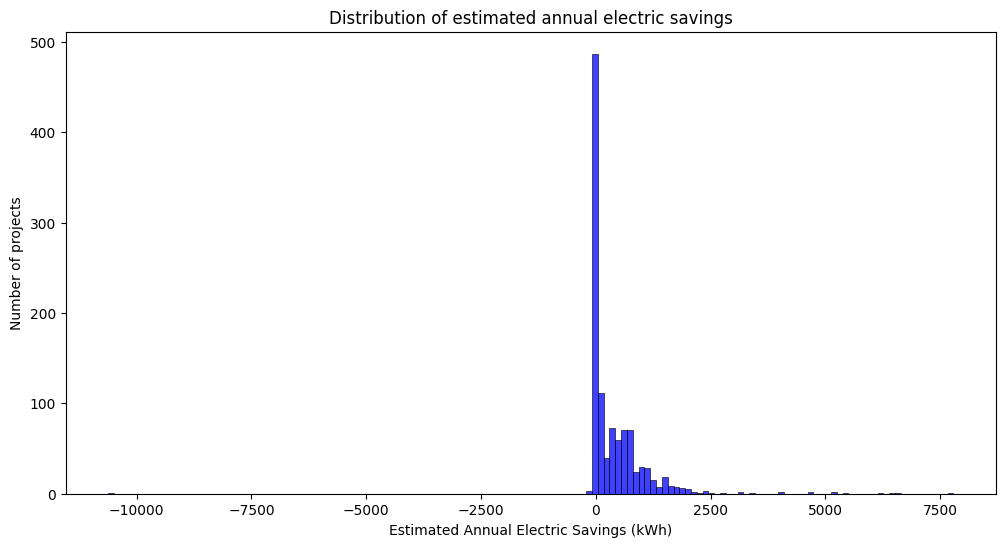

In [671]:
plt.figure(figsize=(12, 6))
sns.histplot(data["estimated_annual_electric_savings"], color='blue')
plt.title('Distribution of estimated annual electric savings')
plt.xlabel('Estimated Annual Electric Savings (kWh)')
plt.ylabel('Number of projects')
plt.show()

In [655]:
data['estimated_annual_electric_savings'].describe()

count     1086.000000
mean       403.046041
std        802.562307
min     -10624.000000
25%          0.000000
50%         81.500000
75%        654.000000
max       7786.000000
Name: estimated_annual_electric_savings, dtype: float64

In [656]:
data['estimated_annual_electric_savings'].median()

81.5

Due to high amount of missing values, skewness, and redundancy with other columns (baseline_electric and reporting_electric leading into evaluated_annual_electric_savings), estimated_annual_electric_savings will be dropped from the dataset for analysis.

### 4.2 Estimated gas savings

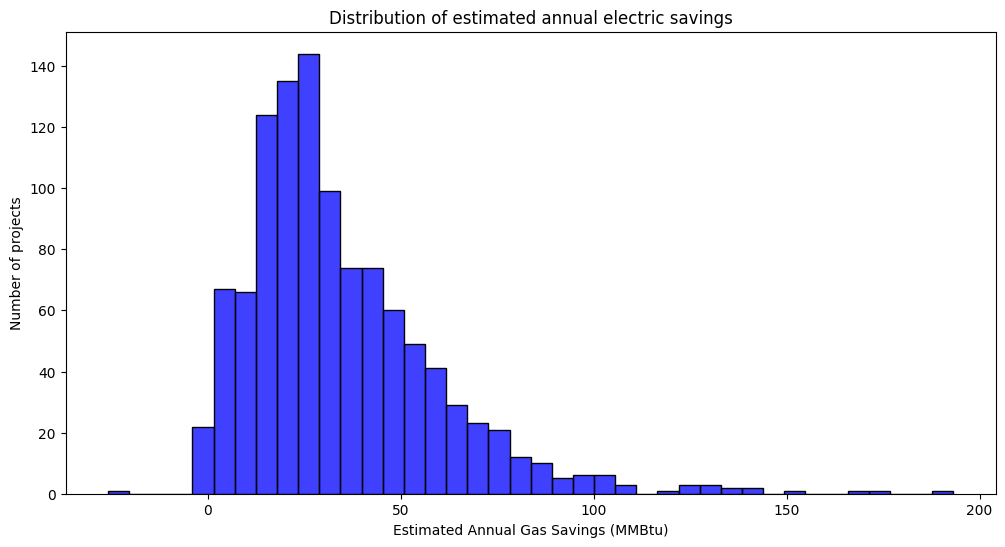

In [672]:
plt.figure(figsize=(12, 6))
sns.histplot(data["estimated_annual_gas_savings"], color='blue')
plt.title('Distribution of estimated annual electric savings')
plt.xlabel('Estimated Annual Gas Savings (MMBtu)')
plt.ylabel('Number of projects')
plt.show()

In [657]:
data['estimated_annual_gas_savings'].describe()

count    1086.000000
mean       34.400783
std        25.055760
min       -25.840000
25%        17.765000
50%        28.335000
75%        46.090000
max       193.210000
Name: estimated_annual_gas_savings, dtype: float64

In [658]:
data['estimated_annual_gas_savings'].describe()

count    1086.000000
mean       34.400783
std        25.055760
min       -25.840000
25%        17.765000
50%        28.335000
75%        46.090000
max       193.210000
Name: estimated_annual_gas_savings, dtype: float64

Despite improved distribution, due to high missing values and redundancy with other columns (baseline_gas and reporting_gas leading into evaluated_annual_gas_savings), estimated_annual_gas_savings is removed from the dataset for analysis.

In [659]:
cleaned_data = data.drop(columns=['estimated_annual_gas_savings', 'estimated_annual_electric_savings'])

In [660]:
cleaned_data.isna().sum()

project_id                                  0
contractor_id                               0
project_county                              0
project_city                                0
project_zip                                 0
climate_zone                                0
weather_station                             0
weather_station-normalization               0
project_completion_date                     0
customer_type                               0
size_of_home                                0
volume_of_home                              0
number_of_units                             0
year_home_built                             0
total_project_cost                          0
contractor_incentive                        0
total_incentive                             0
amount_financed_through_program             0
estimated_first_year_energy_bill_savings    0
baseline_electric                           0
baseline_gas                                0
reporting_electric                

In [664]:
cleaned_data['all_false'].unique()

array([False])

In [668]:
cleaned_data.to_csv('cleaned_data.csv')